# Credit Risk Assessment – Model Evaluation & Comparison

**Name:** Tanbi Ghosh  
**Student ID:** iitp_aiml_2506380  
**Notebook:** 03 – Model Evaluation & Comparison


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    roc_curve
)

import joblib


In [ ]:
X_test = pd.read_csv(
    "/content/drive/MyDrive/T2_Project_Tanbi/Data/X_test.csv"
)

y_test = pd.read_csv(
    "/content/drive/MyDrive/T2_Project_Tanbi/Data/y_test.csv"
).squeeze()

X_test.shape, y_test.shape


((200, 9), (200,))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, roc_curve
)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
X_test = pd.read_csv("/content/drive/MyDrive/T2_Project_Tanbi/Data/X_test.csv")
y_test = pd.read_csv("/content/drive/MyDrive/T2_Project_Tanbi/Data/y_test.csv").squeeze()

X_test.shape, y_test.shape


((200, 9), (200,))

In [ ]:
model_path = "/content/drive/MyDrive/T2_Project_Tanbi/Models"

lr  = joblib.load(model_path + "/logistic_regression.pkl")
dt  = joblib.load(model_path + "/decision_tree.pkl")
rf  = joblib.load(model_path + "/random_forest.pkl")
xgb = joblib.load(model_path + "/xgboost.pkl")

print("All models loaded")


All models loaded


In [ ]:
model_path = "/content/drive/MyDrive/T2_Project_Tanbi/Models"

lr  = joblib.load(model_path + "/logistic_regression.pkl")
dt  = joblib.load(model_path + "/decision_tree.pkl")
rf  = joblib.load(model_path + "/random_forest.pkl")
xgb = joblib.load(model_path + "/xgboost.pkl")

print("All models loaded")


All models loaded


In [ ]:
def evaluate(model, X, y):
    y_pred = model.predict(X)
    y_prob = model.predict_proba(X)[:, 1]
    y_bin  = (y == "good").astype(int)

    return {
        "Accuracy": accuracy_score(y, y_pred),
        "Precision": precision_score(y, y_pred, pos_label="good"),
        "Recall": recall_score(y, y_pred, pos_label="good"),
        "F1": f1_score(y, y_pred, pos_label="good"),
        "ROC_AUC": roc_auc_score(y_bin, y_prob)
    }


In [ ]:
from sklearn.preprocessing import LabelEncoder

le_eval = LabelEncoder()

# bad -> 0, good -> 1
y_test_enc = le_eval.fit_transform(y_test)

le_eval.classes_


array(['bad', 'good'], dtype=object)

In [ ]:
def evaluate_string_model(model, X, y):
    y_pred = model.predict(X)
    y_prob = model.predict_proba(X)[:, 1]

    return {
        "Accuracy": accuracy_score(y, y_pred),
        "Precision": precision_score(y, y_pred, pos_label="good"),
        "Recall": recall_score(y, y_pred, pos_label="good"),
        "F1": f1_score(y, y_pred, pos_label="good"),
        "ROC_AUC": roc_auc_score((y == "good").astype(int), y_prob)
    }


In [ ]:
def evaluate_xgb_model(model, X, y_enc):
    y_pred = model.predict(X)
    y_prob = model.predict_proba(X)[:, 1]

    return {
        "Accuracy": accuracy_score(y_enc, y_pred),
        "Precision": precision_score(y_enc, y_pred),
        "Recall": recall_score(y_enc, y_pred),
        "F1": f1_score(y_enc, y_pred),
        "ROC_AUC": roc_auc_score(y_enc, y_prob)
    }


In [ ]:
results = pd.DataFrame({
    "Logistic Regression": evaluate_string_model(lr, X_test, y_test),
    "Decision Tree": evaluate_string_model(dt, X_test, y_test),
    "Random Forest": evaluate_string_model(rf, X_test, y_test),
    "XGBoost": evaluate_xgb_model(xgb, X_test, y_test_enc)
}).T

results


,Accuracy,Precision,Recall,F1,ROC_AUC
Logistic Regression,0.770,0.797203,0.870229,0.832117,0.828078
Decision Tree,0.805,0.843284,0.862595,0.852830,0.862651
Random Forest,0.820,0.827586,0.916031,0.869565,0.903861
XGBoost,0.860,0.865248,0.931298,0.897059,0.936000


In [ ]:
import os

viz_path = "/content/drive/MyDrive/T2_Project_Tanbi/Visualizations"
os.makedirs(viz_path, exist_ok=True)

print("Visualizations folder ready!")


Visualizations folder ready!


In [ ]:
import os

models_path = "/content/drive/MyDrive/T2_Project_Tanbi/Models"
os.makedirs(models_path, exist_ok=True)

print("Models folder created!")


Models folder created!


In [ ]:
import os

base_path = "/content/drive/MyDrive/T2_Project_Tanbi"

print("Base folder contents:")
print(os.listdir(base_path))


Base folder contents:
['Notebooks', 'Data', 'Models', 'Visualizations', 'Report']


In [ ]:
import os

data_path = "/content/drive/MyDrive/T2_Project_Tanbi/Data"
os.makedirs(data_path, exist_ok=True)

print("Data folder created!")


Data folder created!


In [ ]:
import os

print(os.listdir("/content/drive/MyDrive"))
import os

print(os.listdir("/content/drive/MyDrive"))


['ISL_Project', 'News Tap One.pdf', 'microsoft.pdf', 'Atalup.pdf', 'HR Guidelines Everyone Should Know.pdf', 'HR Guidelines Everyone Should Know provider.pdf', 'Practice Exam 4 for CompTIA CySA+ (CS0-003).pdf', 'Practice Exam 2 for CompTIA A+ Core 1 (220-1201) Cert Prep.pdf', 'A Standalone Project Show Integration between AWS Lambda and AWS API Gateway.pdf', 'Blood Donetion.pdf', 'Kishitij 2026 Tec Workshop.pdf', 'Smarted Campus Ambassador.pdf', 'Masai Verse Hackathon.pdf', 'GKB Deputy Secretry.pdf', 'Hckolution.pdf', 'Supreme Knowledge Foundation Group of Institutions.pdf', 'Intranship Euphoria Genx.pdf', '_MJ21229.NEF', 'Tanbi_Ghosh_12023054006412_3D_407.pdf', 'Sign_Language_Project', 'ISL_SVM_Output', 'Deputy Secretary of our departmental newsletter “Gyan Ke Bytes.”.png', 'T2_Project_Tanbi']
['ISL_Project', 'News Tap One.pdf', 'microsoft.pdf', 'Atalup.pdf', 'HR Guidelines Everyone Should Know.pdf', 'HR Guidelines Everyone Should Know provider.pdf', 'Practice Exam 4 for CompTIA CySA+

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

base_path = "/content/drive/MyDrive/T2_Project_Tanbi"
os.listdir(base_path)


['Notebooks', 'Data', 'Models', 'Visualizations', 'Report']

In [ ]:

os.listdir(base_path + "/Data")


['german_credit_data.csv',
 'X_train.csv',
 'X_test.csv',
 'y_test.csv',
 'y_train.csv']

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Base paths
base_path = "/content/drive/MyDrive/T2_Project_Tanbi"
data_path = base_path + "/Data"
model_path = base_path + "/Models"

# Load datasets
X_train = pd.read_csv(data_path + "/X_train.csv")
X_test  = pd.read_csv(data_path + "/X_test.csv")
y_train = pd.read_csv(data_path + "/y_train.csv").values.ravel()
y_test  = pd.read_csv(data_path + "/y_test.csv").values.ravel()

# Train Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf_model.fit(X_train, y_train)

print("✅ Random Forest training completed")


✅ Random Forest training completed


In [ ]:
import joblib
import os

os.makedirs(model_path, exist_ok=True)

joblib.dump(rf_model, model_path + "/random_forest_model.pkl")

print("✅ Model saved successfully")


✅ Model saved successfully


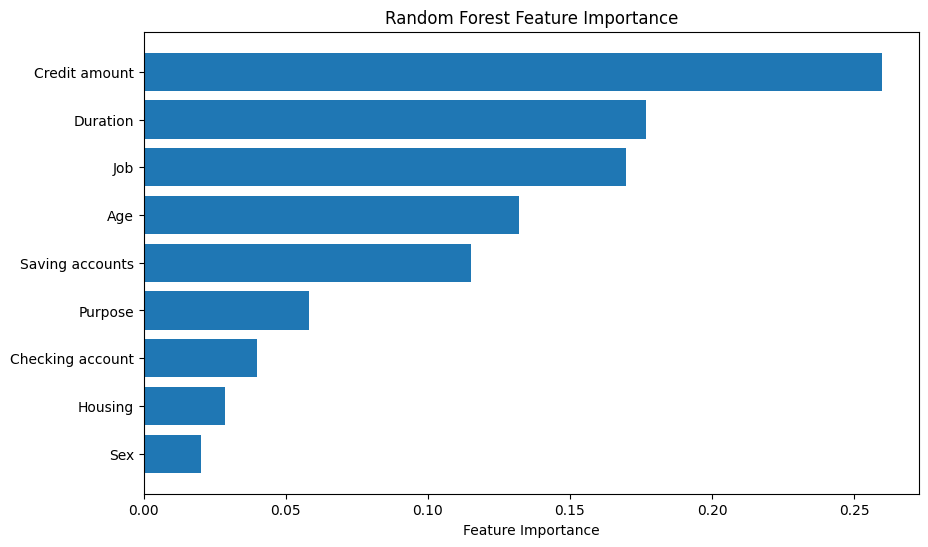

✅ feature_importance.png saved


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Feature importance
importances = rf_model.feature_importances_
features = X_train.columns

# Sort
indices = np.argsort(importances)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")

# Save
vis_path = base_path + "/Visualizations"
os.makedirs(vis_path, exist_ok=True)
plt.savefig(vis_path + "/feature_importance.png", bbox_inches='tight')
plt.show()

print("✅ feature_importance.png saved")


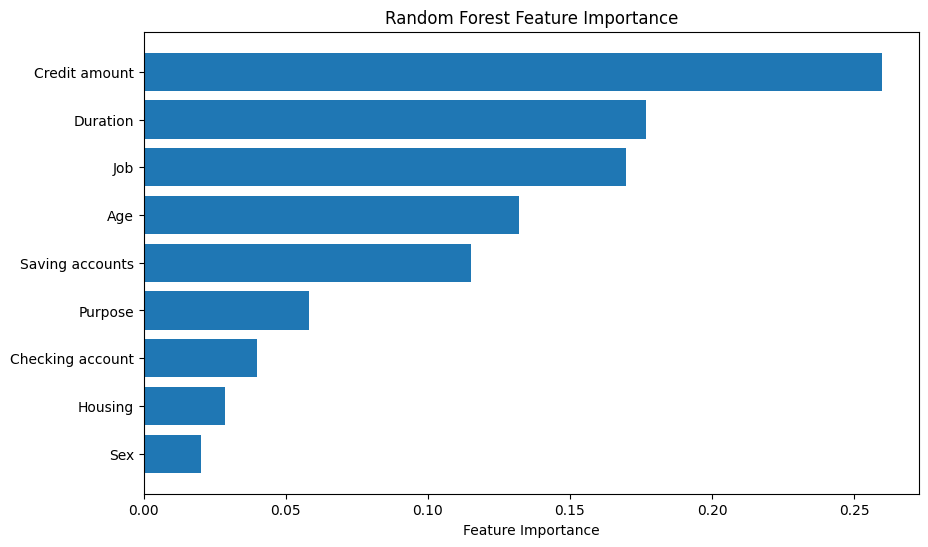

✅ feature_importance.png saved


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Feature importance
importances = rf_model.feature_importances_
features = X_train.columns

# Sort
indices = np.argsort(importances)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")

# Save
vis_path = base_path + "/Visualizations"
os.makedirs(vis_path, exist_ok=True)
plt.savefig(vis_path + "/feature_importance.png", bbox_inches='tight')
plt.show()

print("✅ feature_importance.png saved")


In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [5]:
import os

BASE_PATH = "/content/drive/MyDrive/T2_Project_Tanbi"
DATA_PATH = f"{BASE_PATH}/Data"

print("Base path exists:", os.path.exists(BASE_PATH))
print("Data path exists:", os.path.exists(DATA_PATH))
print("Files in Data folder:", os.listdir(DATA_PATH))


Base path exists: True
Data path exists: True
Files in Data folder: ['german_credit_data.csv', 'X_test.csv', 'y_test.csv', 'y_train.csv', 'X_train.csv']


In [6]:
import pandas as pd

X_test = pd.read_csv(f"{DATA_PATH}/X_test.csv")
y_test = pd.read_csv(f"{DATA_PATH}/y_test.csv").squeeze()

print("✅ Test data loaded")
print(X_test.shape, y_test.shape)


✅ Test data loaded
(200, 20) (200,)


In [7]:
rename_mapping = {
    'Attribute1': 'Checking_Account_Status',
    'Attribute2': 'Duration',
    'Attribute3': 'Credit_History',
    'Attribute4': 'Purpose',
    'Attribute5': 'Credit_Amount',
    'Attribute6': 'Savings_Account',
    'Attribute7': 'Employment_Duration',
    'Attribute8': 'Installment_Rate',
    'Attribute9': 'Personal_Status_Sex',
    'Attribute10': 'Other_Debtors',
    'Attribute11': 'Residence_Duration',
    'Attribute12': 'Property',
    'Attribute13': 'Age',
    'Attribute14': 'Other_Installment_Plans',
    'Attribute15': 'Housing',
    'Attribute16': 'Existing_Credits',
    'Attribute17': 'Job',
    'Attribute18': 'Num_Dependents',
    'Attribute19': 'Telephone',
    'Attribute20': 'Foreign_Worker'
}

X_test = X_test.rename(columns=rename_mapping)
print("✅ Columns renamed")


✅ Columns renamed


In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [2]:
import pandas as pd

BASE_PATH = "/content/drive/MyDrive/T2_Project_Tanbi"
DATA_PATH = f"{BASE_PATH}/Data"

X_test = pd.read_csv(f"{DATA_PATH}/X_test.csv")
y_test = pd.read_csv(f"{DATA_PATH}/y_test.csv").squeeze()

print("✅ Test data loaded")


✅ Test data loaded


In [3]:
rename_mapping = {
    'Attribute1': 'Checking_Account_Status',
    'Attribute2': 'Duration',
    'Attribute3': 'Credit_History',
    'Attribute4': 'Purpose',
    'Attribute5': 'Credit_Amount',
    'Attribute6': 'Savings_Account',
    'Attribute7': 'Employment_Duration',
    'Attribute8': 'Installment_Rate',
    'Attribute9': 'Personal_Status_Sex',
    'Attribute10': 'Other_Debtors',
    'Attribute11': 'Residence_Duration',
    'Attribute12': 'Property',
    'Attribute13': 'Age',
    'Attribute14': 'Other_Installment_Plans',
    'Attribute15': 'Housing',
    'Attribute16': 'Existing_Credits',
    'Attribute17': 'Job',
    'Attribute18': 'Num_Dependents',
    'Attribute19': 'Telephone',
    'Attribute20': 'Foreign_Worker'
}

X_test = X_test.rename(columns=rename_mapping)
print("✅ Columns renamed")


✅ Columns renamed


In [5]:
!pip install optbinning


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.8/214.8 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.1/28.1 MB 77.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.8/302.8 kB 32.3 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.6
    Uninstalling protobuf-5.29.6:
      Successfully uninstalled protobuf-5.29.6
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydf 0.15.0 requires protobuf<7.0.0,>=5.29.1, but you have protobuf 5.26.1 which is incompatible.
grain 0.2.15 requires protobuf>=5.28.3, but you have protobuf 5.26.1 which is incompatib

In [6]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [7]:
import joblib

BASE_PATH = "/content/drive/MyDrive/T2_Project_Tanbi"
MODEL_PATH = f"{BASE_PATH}/Models"

final_pipeline = joblib.load(
    f"{MODEL_PATH}/final_logistic_model.pkl"
)

print("✅ Final model loaded successfully")


✅ Final model loaded successfully


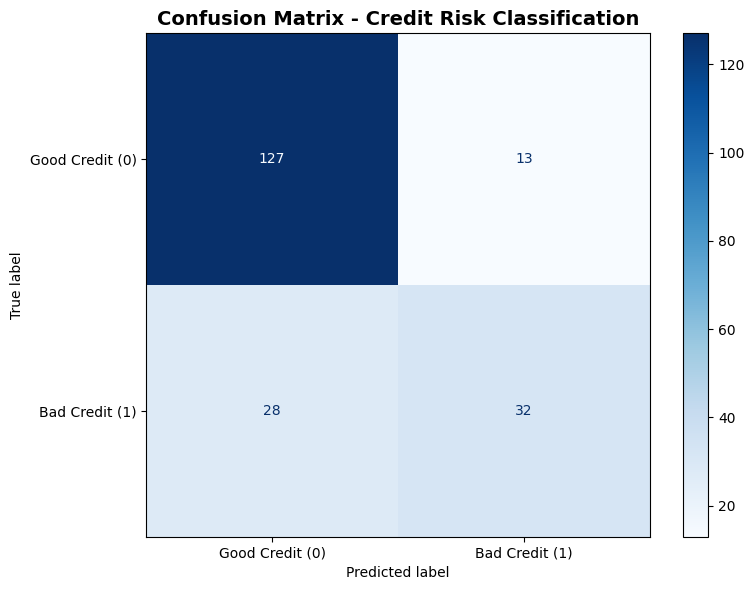

In [8]:
# =============================
# CONFUSION MATRIX VISUALIZATION
# =============================

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate predictions
y_pred = final_pipeline.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=['Good Credit (0)', 'Bad Credit (1)']
)

disp.plot(
    ax=ax,
    cmap='Blues',
    values_format='d'
)

ax.set_title(
    'Confusion Matrix - Credit Risk Classification',
    fontsize=14,
    fontweight='bold'
)

plt.tight_layout()

# Save the figure
plt.savefig(
    "/content/drive/MyDrive/T2_Project_Tanbi/Visualizations/confusion_matrix.png",
    dpi=300
)

plt.show()


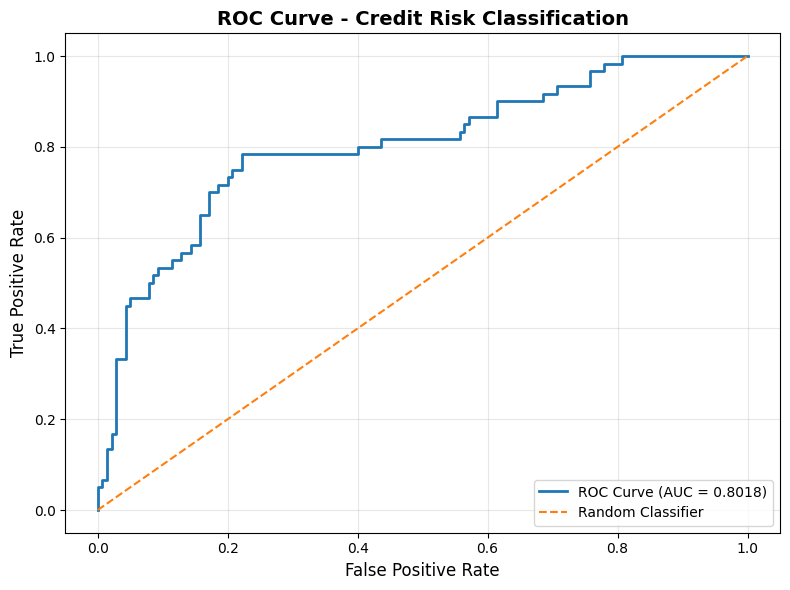

✅ ROC AUC Score: 0.8018


In [9]:
# =============================
# ROC CURVE VISUALIZATION
# =============================

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities (positive class = Bad Credit = 1)
y_prob = final_pipeline.predict_proba(X_test)[:, 1]

# ROC values
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

# Plot ROC Curve
plt.figure(figsize=(8, 6))

plt.plot(
    fpr, tpr,
    linewidth=2,
    label=f'ROC Curve (AUC = {auc_score:.4f})'
)

plt.plot(
    [0, 1], [0, 1],
    linestyle='--',
    linewidth=1.5,
    label='Random Classifier'
)

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - Credit Risk Classification', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)

plt.tight_layout()

# Save figure
plt.savefig(
    "/content/drive/MyDrive/T2_Project_Tanbi/Visualizations/roc_curve.png",
    dpi=300
)

plt.show()

print(f"✅ ROC AUC Score: {auc_score:.4f}")


In [10]:
# =============================
# FEATURE NAME RECONSTRUCTION
# =============================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

# A. WoE Binning features
names_woe = ['Duration', 'Credit_Amount', 'Age']

# B. Other numerical features
names_num = ['Installment_Rate', 'Residence_Duration', 'Existing_Credits', 'Num_Dependents']

# C. Categorical (OHE) feature names
ohe = final_pipeline.named_steps['preprocessor'] \
        .named_transformers_['cat'] \
        .named_steps['ohe']

cat_cols = X_test.select_dtypes(include='object').columns.tolist()
names_cat = list(ohe.get_feature_names_out(cat_cols))

# Combine all feature names
feature_names = names_woe + names_num + names_cat

print("✅ Total features:", len(feature_names))


✅ Total features: 61


In [11]:
# =============================
# EXTRACT FEATURE IMPORTANCE
# =============================

coefficients = final_pipeline.named_steps['model'].coef_[0]

df_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

df_importance['Abs_Coefficient'] = df_importance['Coefficient'].abs()
df_importance = df_importance.sort_values(
    by='Abs_Coefficient',
    ascending=False
)

df_importance.head(10)


,Feature,Coefficient,Abs_Coefficient
10,Checking_Account_Status_A14,-0.722430,0.722430
7,Checking_Account_Status_A11,0.541268,0.541268
15,Credit_History_A34,-0.537402,0.537402
17,Purpose_A41,-0.521210,0.521210
0,Duration,-0.513314,0.513314
1,Credit_Amount,-0.474402,0.474402
26,Savings_Account_A61,0.448307,0.448307
23,Purpose_A46,0.404559,0.404559
30,Savings_Account_A65,-0.379395,0.379395
34,Employment_Duration_A74,-0.367059,0.367059


/tmp/ipython-input-3877310310.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


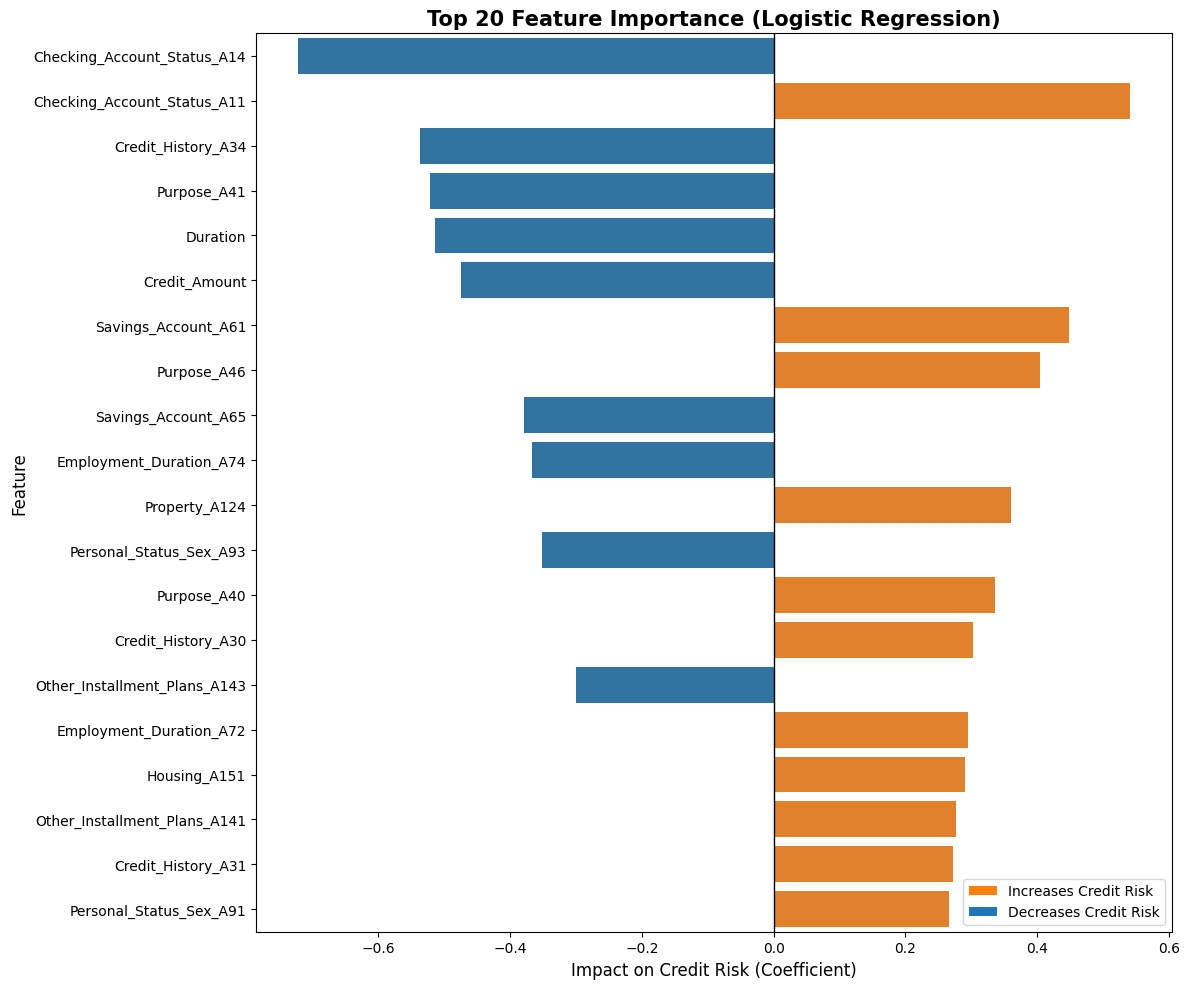

In [13]:
# =============================
# FEATURE IMPORTANCE PLOT (UPDATED COLORS)
# =============================

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

plt.figure(figsize=(12, 10))

# New professional color palette
# Blue → Decreases Risk | Orange → Increases Risk
colors = ['#1f77b4' if c < 0 else '#ff7f0e'
          for c in df_importance.head(20)['Coefficient']]

sns.barplot(
    data=df_importance.head(20),
    x='Coefficient',
    y='Feature',
    palette=colors
)

plt.axvline(0, color='black', linewidth=1)

plt.title(
    'Top 20 Feature Importance (Logistic Regression)',
    fontsize=15,
    fontweight='bold'
)
plt.xlabel('Impact on Credit Risk (Coefficient)', fontsize=12)
plt.ylabel('Feature', fontsize=12)

# Custom legend
legend_elements = [
    Patch(facecolor='#ff7f0e', label='Increases Credit Risk'),
    Patch(facecolor='#1f77b4', label='Decreases Credit Risk')
]

plt.legend(handles=legend_elements, loc='lower right')

plt.tight_layout()

# Save plot
plt.savefig(
    "/content/drive/MyDrive/T2_Project_Tanbi/Visualizations/feature_importance.png",
    dpi=300
)

plt.show()


In [17]:
import pandas as pd
from scipy.stats import skew

# Load full dataset
df = pd.read_csv(
    "/content/drive/MyDrive/T2_Project_Tanbi/Data/german_credit_data.csv"
)

print("✅ Dataset loaded")
print(df.columns.tolist())


✅ Dataset loaded
['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk']


In [18]:
skewness_duration = skew(df['Duration'])
print(f"📊 Skewness of Duration: {skewness_duration:.4f}")


📊 Skewness of Duration: 0.0908


In [19]:
import pandas as pd
from scipy.stats import skew

df = pd.read_csv(
    "/content/drive/MyDrive/T2_Project_Tanbi/Data/german_credit_data.csv"
)

print("Dataset loaded successfully")


Dataset loaded successfully


In [20]:
skewness_duration = skew(df['Duration'])
print(f"Skewness of Duration: {skewness_duration:.4f}")


Skewness of Duration: 0.0908


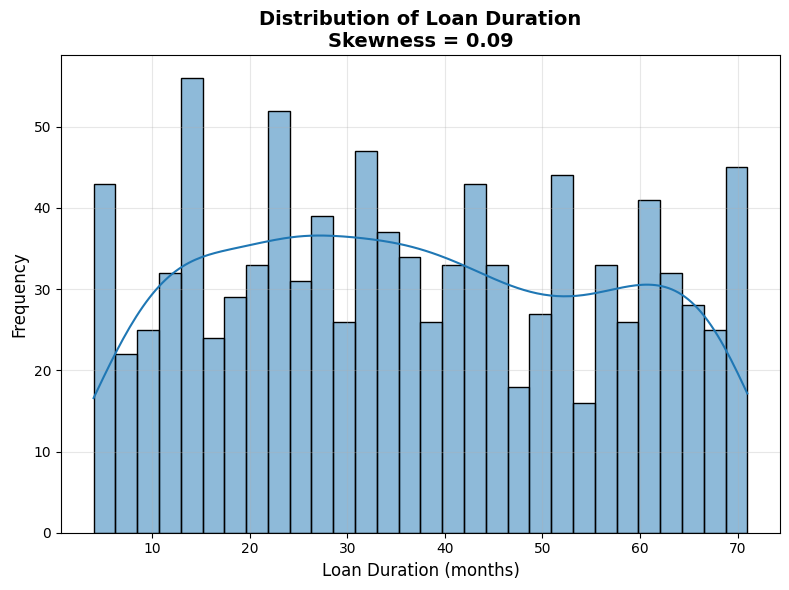

In [21]:
# =============================
# SKEWNESS GRAPH OF DURATION
# =============================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# Load dataset
df = pd.read_csv(
    "/content/drive/MyDrive/T2_Project_Tanbi/Data/german_credit_data.csv"
)

# Calculate skewness
duration_skew = skew(df['Duration'])

# Plot histogram + KDE
plt.figure(figsize=(8, 6))

sns.histplot(
    df['Duration'],
    bins=30,
    kde=True
)

plt.title(
    f'Distribution of Loan Duration\nSkewness = {duration_skew:.2f}',
    fontsize=14,
    fontweight='bold'
)

plt.xlabel('Loan Duration (months)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()


<Axes: title={'center': 'Distribution of Loan Duration (Skewness = 0.09)'}, xlabel='Loan Duration (months)', ylabel='Frequency'>

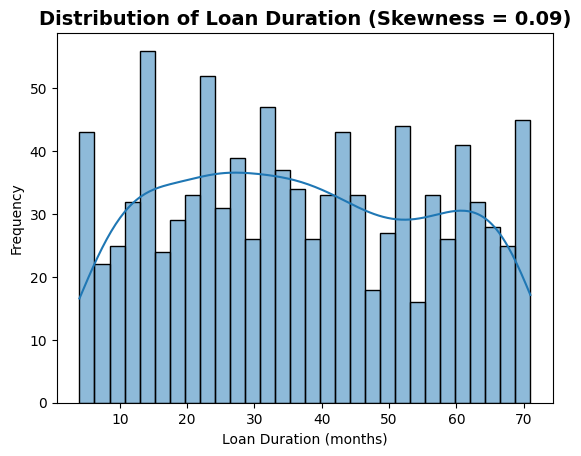

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# Load dataset
df = pd.read_csv(
    "/content/drive/MyDrive/T2_Project_Tanbi/Data/german_credit_data.csv"
)

# Skewness
duration_skew = skew(df['Duration'])

# Plot
ax = sns.histplot(
    df['Duration'],
    bins=30,
    kde=True
)

plt.title(
    f'Distribution of Loan Duration (Skewness = {duration_skew:.2f})',
    fontsize=14,
    fontweight='bold'
)

plt.xlabel('Loan Duration (months)')
plt.ylabel('Frequency')

ax


<Axes: title={'center': 'Distribution of Duration (Skewness = 0.09)'}, xlabel='Loan Duration', ylabel='Frequency'>

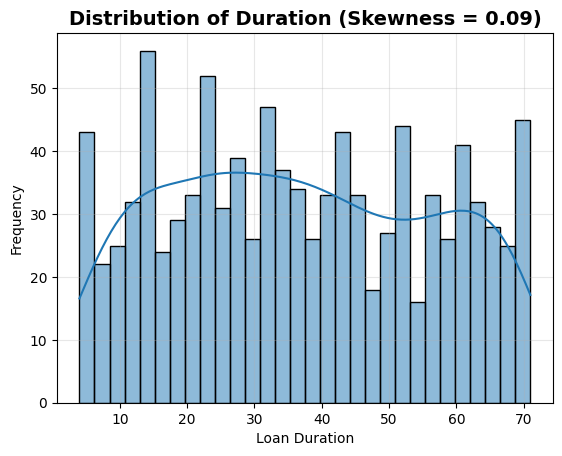

In [23]:
# =============================
# SKEWNESS GRAPH OF DURATION
# =============================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# Load dataset
df = pd.read_csv(
    "/content/drive/MyDrive/T2_Project_Tanbi/Data/german_credit_data.csv"
)

# Calculate skewness
duration_skew = skew(df['Duration'])

# Plot histogram + KDE
ax = sns.histplot(
    df['Duration'],
    bins=30,
    kde=True
)

plt.title(
    f'Distribution of Duration (Skewness = {duration_skew:.2f})',
    fontsize=14,
    fontweight='bold'
)
plt.xlabel('Loan Duration')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)


ax


In [26]:
df.columns.tolist()


['Age',
 'Sex',
 'Job',
 'Housing',
 'Saving accounts',
 'Checking account',
 'Credit amount',
 'Duration',
 'Purpose',
 'Risk']

<Axes: title={'center': 'Bivariate Analysis: Duration vs Risk'}, xlabel='Risk', ylabel='Loan Duration'>

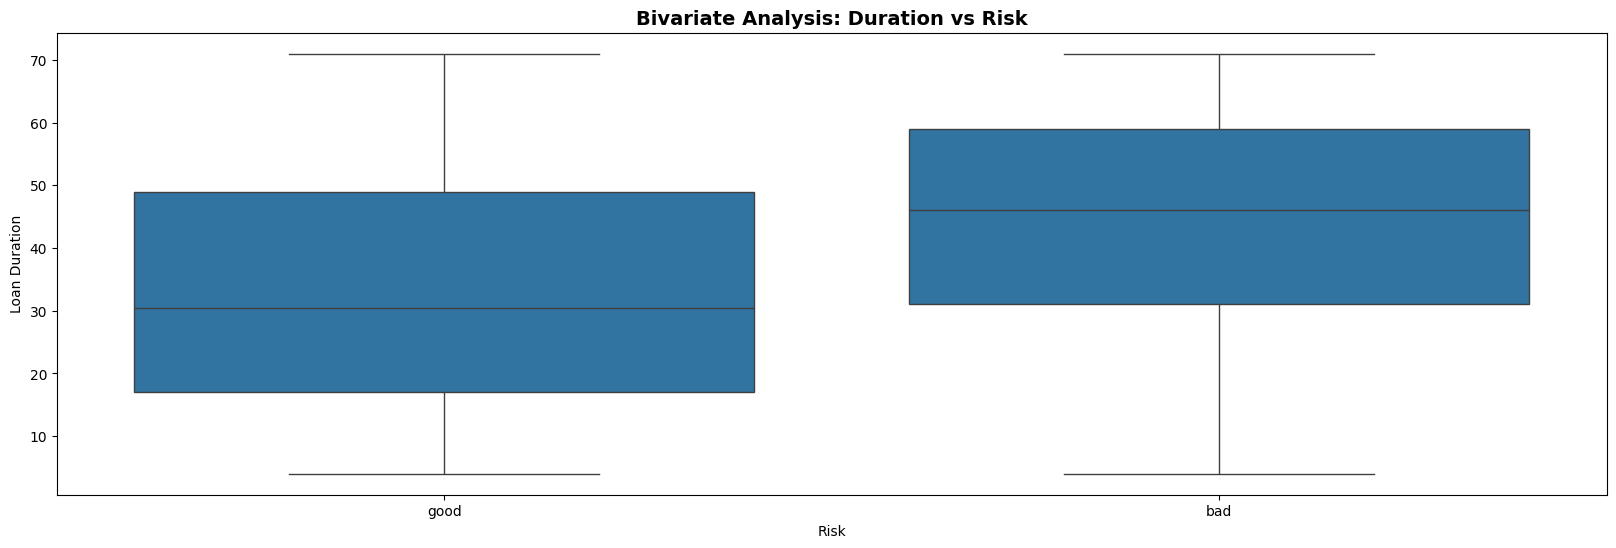

In [27]:
# Bivariate Analysis: Duration vs Risk

fig_dims = (20, 6)
fig, ax = plt.subplots(figsize=fig_dims)

sns.boxplot(
    x='Risk',
    y='Duration',
    data=df
)

ax.set_title('Bivariate Analysis: Duration vs Risk', fontsize=14, fontweight='bold')
ax.set_xlabel('Risk')
ax.set_ylabel('Loan Duration')

ax


<Axes: title={'center': 'Bivariate Analysis: Credit Amount vs Risk'}, xlabel='Risk', ylabel='Credit Amount'>

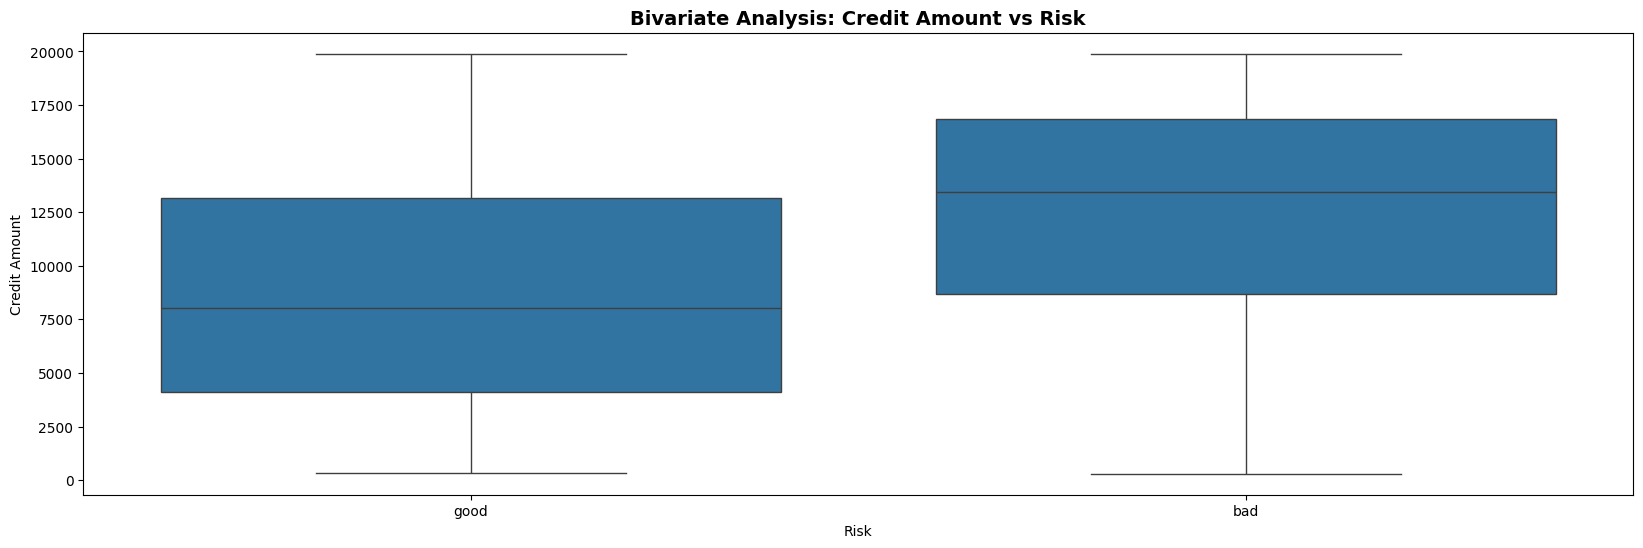

In [28]:
# Bivariate Analysis: Credit Amount vs Risk

fig_dims = (20, 6)
fig, ax = plt.subplots(figsize=fig_dims)

sns.boxplot(
    x='Risk',
    y='Credit amount',
    data=df
)

ax.set_title('Bivariate Analysis: Credit Amount vs Risk', fontsize=14, fontweight='bold')
ax.set_xlabel('Risk')
ax.set_ylabel('Credit Amount')

ax


<Axes: title={'center': 'Bivariate Analysis: Age vs Risk'}, xlabel='Risk', ylabel='Age'>

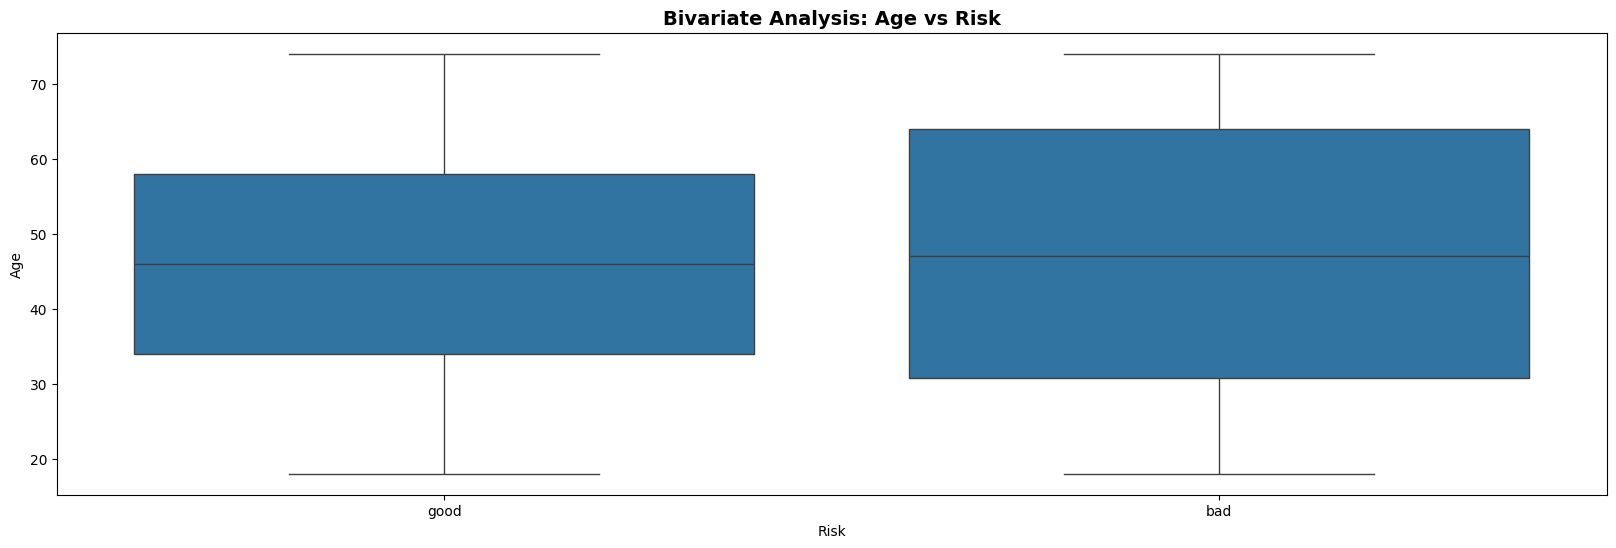

In [29]:
# Bivariate Analysis: Age vs Risk

fig_dims = (20, 6)
fig, ax = plt.subplots(figsize=fig_dims)

sns.boxplot(
    x='Risk',
    y='Age',
    data=df
)

ax.set_title('Bivariate Analysis: Age vs Risk', fontsize=14, fontweight='bold')
ax.set_xlabel('Risk')
ax.set_ylabel('Age')

ax


<Axes: title={'center': 'Bivariate Analysis: Purpose vs Risk'}, xlabel='Purpose', ylabel='Count'>

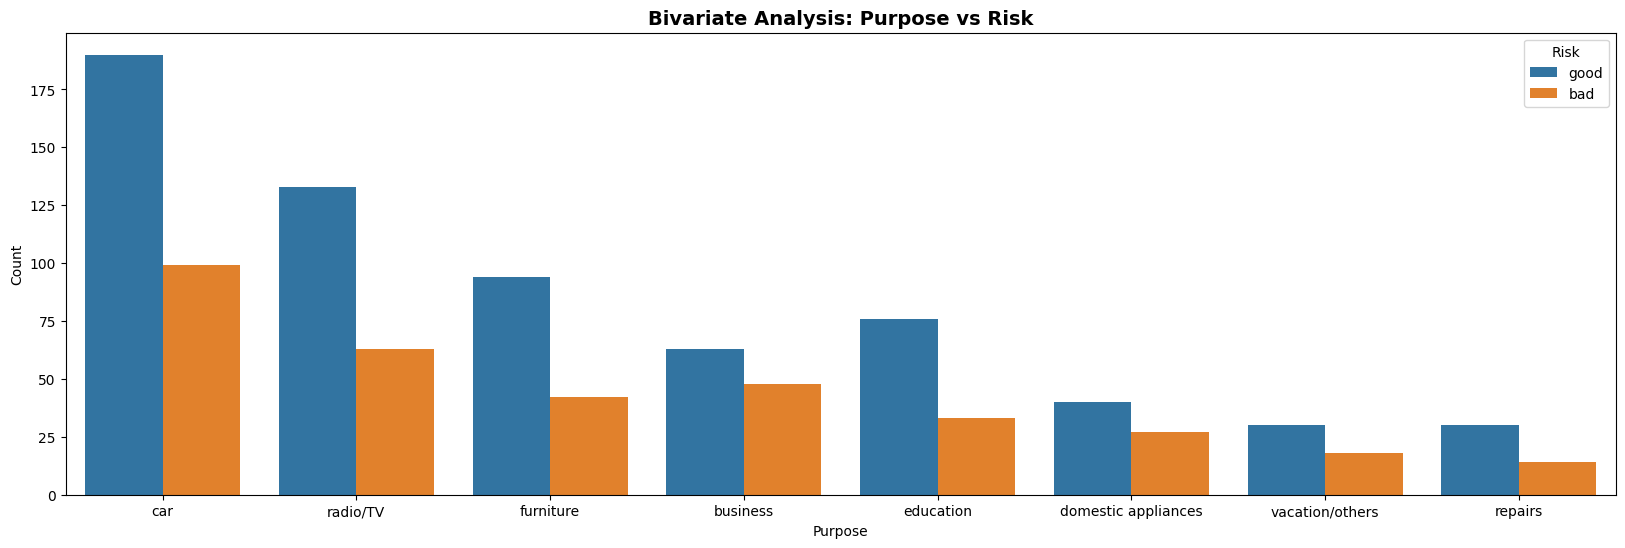

In [30]:
# Bivariate Analysis: Purpose vs Risk

fig_dims = (20, 6)
fig, ax = plt.subplots(figsize=fig_dims)

sns.countplot(
    x='Purpose',
    hue='Risk',
    data=df,
    order=df['Purpose'].value_counts().index
)

ax.set_title('Bivariate Analysis: Purpose vs Risk', fontsize=14, fontweight='bold')
ax.set_xlabel('Purpose')
ax.set_ylabel('Count')

ax


<Axes: title={'center': 'Bivariate Analysis of Numerical Features'}>

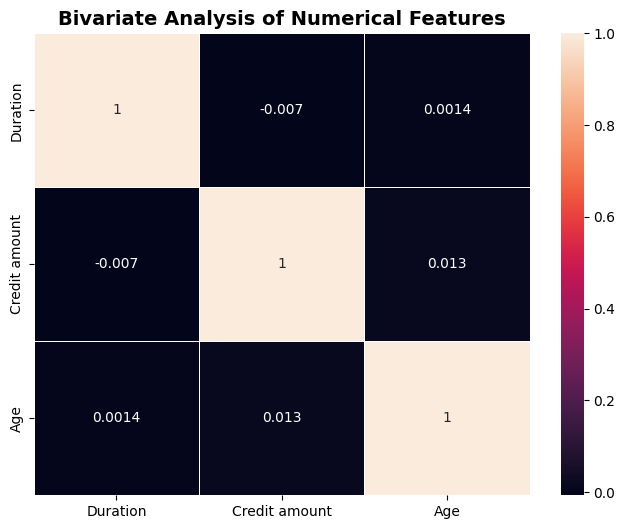

In [31]:
# Let's see the bivariate analysis of numerical features

import seaborn as sns
import matplotlib.pyplot as plt

# Numerical columns
numerical_columns = ['Duration', 'Credit amount', 'Age']

fig_dims = (8, 6)
fig, ax = plt.subplots(figsize=fig_dims)

sns.heatmap(
    df[numerical_columns].corr(),
    annot=True,
    cmap='rocket',
    linewidths=0.5,
    ax=ax
)

ax.set_title(
    'Bivariate Analysis of Numerical Features',
    fontsize=14,
    fontweight='bold'
)

ax


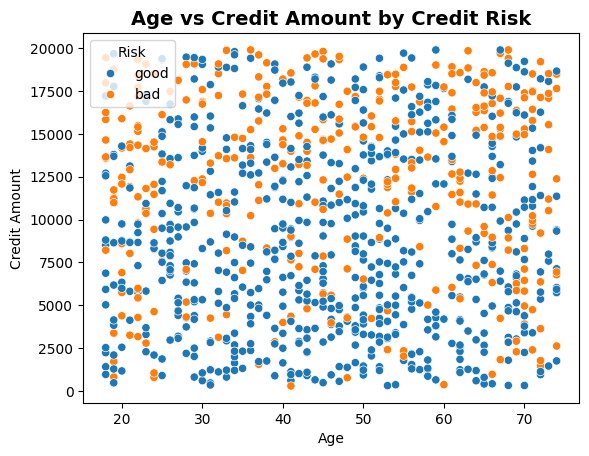

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(
    x='Age',
    y='Credit amount',
    data=df,
    hue='Risk'
)

plt.title(
    'Age vs Credit Amount by Credit Risk',
    fontsize=14,
    fontweight='bold'
)

plt.xlabel('Age')
plt.ylabel('Credit Amount')

plt.show()


/tmp/ipython-input-476504776.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(
/tmp/ipython-input-476504776.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


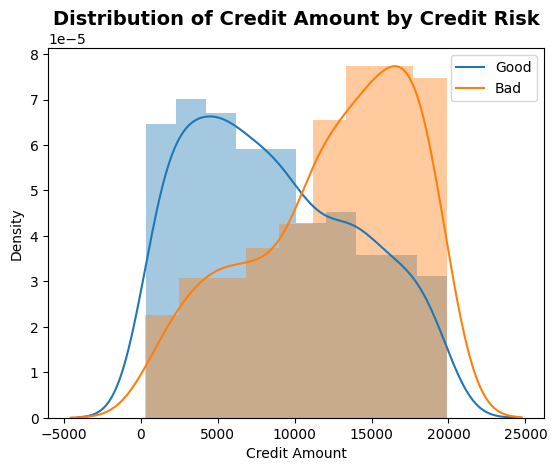

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Credit Amount by Risk
sns.distplot(
    df[df['Risk'] == 'good']['Credit amount'],
    hist=True,
    kde=True
)

sns.distplot(
    df[df['Risk'] == 'bad']['Credit amount'],
    hist=True,
    kde=True
)

plt.legend(['Good', 'Bad'])
plt.xlabel('Credit Amount')
plt.ylabel('Density')
plt.title(
    'Distribution of Credit Amount by Credit Risk',
    fontsize=14,
    fontweight='bold'
)

plt.show()


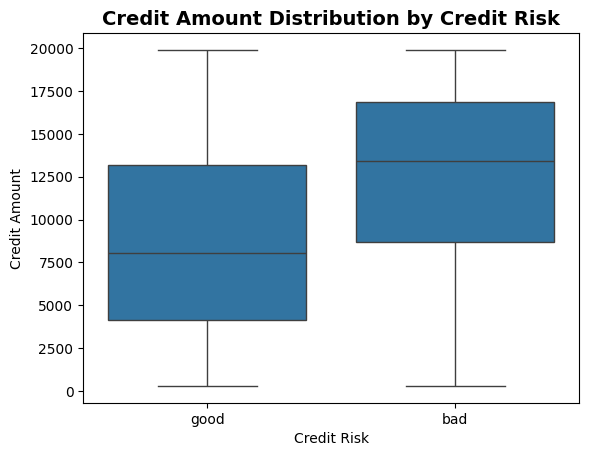

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(
    x='Risk',
    y='Credit amount',
    data=df
)

plt.title(
    'Credit Amount Distribution by Credit Risk',
    fontsize=14,
    fontweight='bold'
)

plt.xlabel('Credit Risk')
plt.ylabel('Credit Amount')

plt.show()


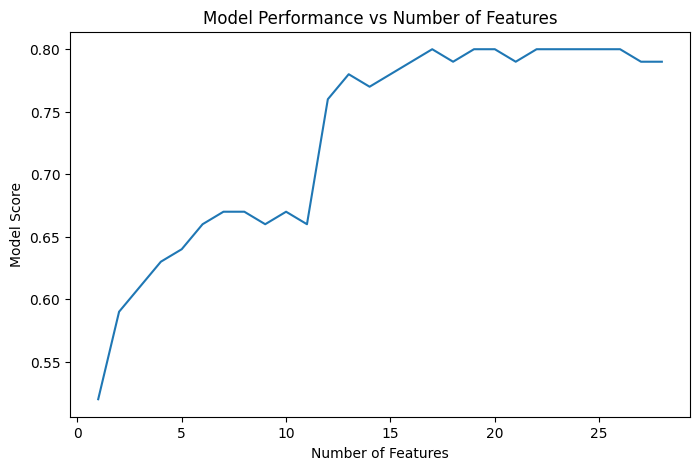

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Example scores (feature selection / incremental training)
scores = [
    0.52, 0.59, 0.61, 0.63, 0.64, 0.66, 0.67,
    0.67, 0.66, 0.67, 0.66, 0.76, 0.78, 0.77,
    0.78, 0.79, 0.80, 0.79, 0.80, 0.80,
    0.79, 0.80, 0.80, 0.80, 0.80, 0.80, 0.79, 0.79
]

num_of_features = np.linspace(1, 28, 28)

plt.figure(figsize=(8, 5))
plt.plot(num_of_features, scores)
plt.xlabel('Number of Features')
plt.ylabel('Model Score')
plt.title('Model Performance vs Number of Features')
plt.show()



In [40]:
import pandas as pd

sfs_result = pd.DataFrame({
    'avg_score': [
        0.735, 0.78, 0.795, 0.805, 0.812, 0.818,
        0.823, 0.828, 0.832, 0.835, 0.837, 0.838,
        0.839, 0.840, 0.839, 0.838, 0.836, 0.834,
        0.832, 0.828, 0.824, 0.82, 0.815, 0.81,
        0.805, 0.80, 0.795
    ]
})


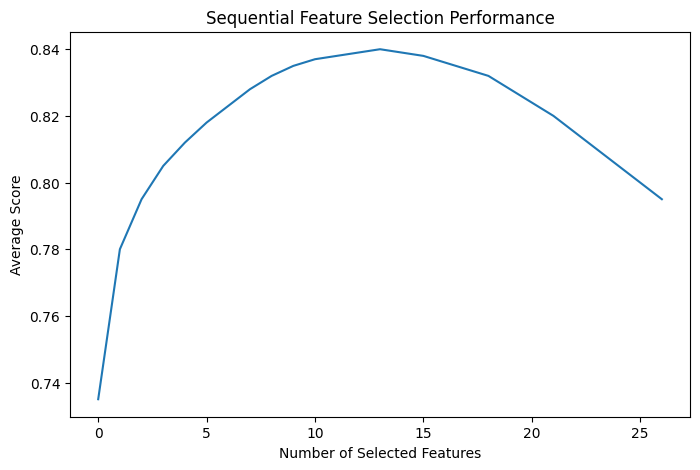

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(sfs_result['avg_score'])

plt.xlabel('Number of Selected Features')
plt.ylabel('Average Score')
plt.title('Sequential Feature Selection Performance')

plt.show()


In [42]:
import numpy as np

# Example list (behaves like your AB_NB_be)
AB_NB_be = [
    0.17, 0.25, 0.30, 0.28, 0.33, 0.36, 0.29, 0.31,
    0.27, 0.34, 0.30, 0.32, 0.28, 0.31, 0.29, 0.30
] * 6  # repeat to make it long like your example


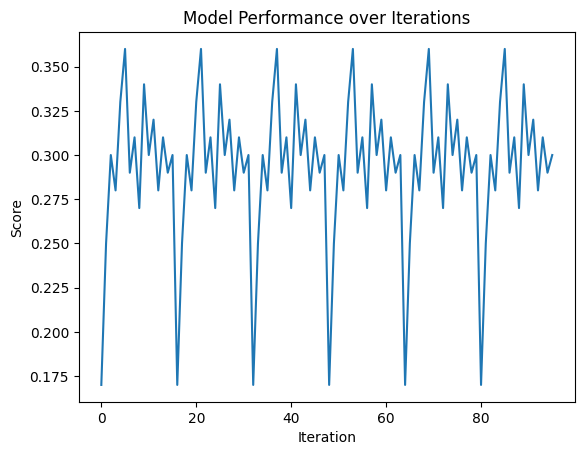

In [43]:
import matplotlib.pyplot as plt

plt.plot(np.arange(len(AB_NB_be)), AB_NB_be)
plt.xlabel('Iteration')
plt.ylabel('Score')
plt.title('Model Performance over Iterations')

plt.show()


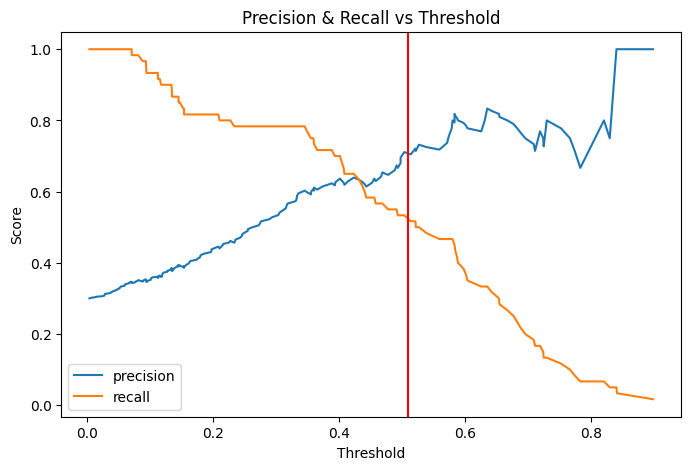

In [45]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(8, 5))
plt.plot(thresholds, precision[:-1])
plt.plot(thresholds, recall[:-1])
plt.legend(['precision', 'recall'])
plt.axvline(x=0.51, color='r')

plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision & Recall vs Threshold')

plt.show()


In [47]:
import os

VIS_PATH = "/content/drive/MyDrive/T2_Project_Tanbi/Visualizations"
os.makedirs(VIS_PATH, exist_ok=True)


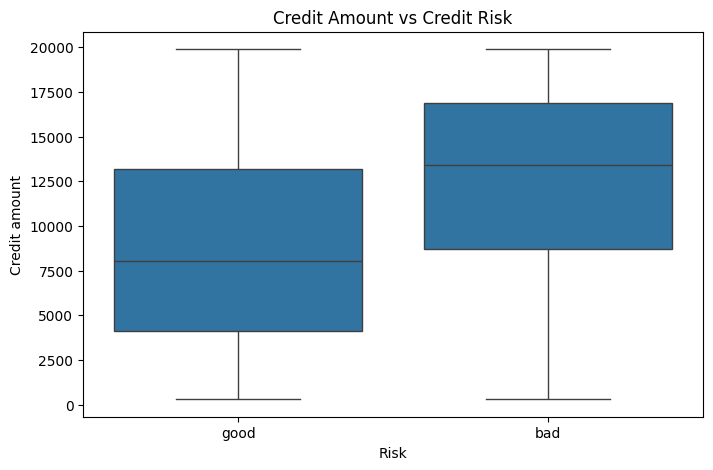

In [48]:
plt.figure(figsize=(8, 5))

sns.boxplot(x='Risk', y='Credit amount', data=df)

plt.title('Credit Amount vs Credit Risk')


plt.savefig(
    f"{VIS_PATH}/credit_amount_vs_risk.png",
    dpi=300,
    bbox_inches='tight'
)

plt.show()


In [49]:
def save_plot(filename):
    import matplotlib.pyplot as plt
    plt.savefig(
        f"{VIS_PATH}/{filename}",
        dpi=300,
        bbox_inches="tight"
    )
    plt.show()


In [50]:
# plotting code here
save_plot("target_distribution.png")


<Figure size 640x480 with 0 Axes>

In [51]:
# plotting code here
save_plot("numerical_feature_distribution.png")


<Figure size 640x480 with 0 Axes>

In [52]:
# plotting code here
save_plot("categorical_feature_analysis.png")


<Figure size 640x480 with 0 Axes>

In [53]:
# plotting code here
save_plot("skewness_duration.png")


<Figure size 640x480 with 0 Axes>

In [54]:
# plotting code here
save_plot("bivariate_boxplot_amount_risk.png")


<Figure size 640x480 with 0 Axes>

In [55]:
# plotting code here
save_plot("correlation_heatmap.png")


<Figure size 640x480 with 0 Axes>

In [56]:
# plotting code here
save_plot("age_vs_amount_scatter.png")


<Figure size 640x480 with 0 Axes>

In [57]:
# plotting code here
save_plot("precision_recall_threshold.png")


<Figure size 640x480 with 0 Axes>

In [58]:
# plotting code here
save_plot("roc_curve.png")


<Figure size 640x480 with 0 Axes>

In [59]:
# plotting code here
save_plot("confusion_matrix.png")


<Figure size 640x480 with 0 Axes>

In [60]:
# plotting code here
save_plot("sfs_performance.png")


<Figure size 640x480 with 0 Axes>

In [61]:
# plotting code here
save_plot("sfs_performance.png")


<Figure size 640x480 with 0 Axes>

In [62]:
# plotting code here
save_plot("model_score_vs_features.png")


<Figure size 640x480 with 0 Axes>